# Camera calibration


In [5]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [6]:
images = glob.glob('images/*.jpeg')

In [52]:
print(cv2.imread(images[0]).shape)

(3024, 4032, 3)


Prepare object point and some other stuff.


In [7]:
cbrow = 9
cbcol = 7

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((cbrow*cbcol,3), np.float32)
objp[:,:2] = np.mgrid[0:cbcol,0:cbrow].T.reshape(-1,2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [8]:
# Code from Moodle
def findCorners(gray_, img_, fname_):
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray_, (cbcol,cbrow),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray_,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img_ = cv2.drawChessboardCorners(img_, (cbcol,cbrow), corners2,ret)    

In [9]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    findCorners(gray, img, fname)

In [48]:
matrix_list = []
distortion_list = []

In [49]:
for i in range(1, len(imgpoints)):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints[0:i], imgpoints[0:i], gray.shape[::-1],None,None)
    matrix_list.append(mtx)
    distortion_list.append(dist)

In [50]:
fx_list = []
fy_list = []
cx_list = []
cy_list = []

for matrix in matrix_list:
    fx_list.append(matrix[0][0])
    fy_list.append(matrix[1][1])
    cx_list.append(matrix[0][2])
    cy_list.append(matrix[1][2])

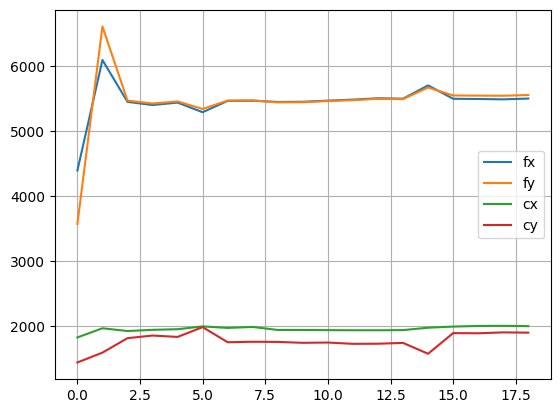

In [51]:
plt.plot(fx_list, label= "fx")
plt.plot(fy_list, label= "fy")

plt.plot(cx_list, label= "cx")
plt.plot(cy_list, label= "cy")

plt.grid()
plt.legend()